Installed networkx into python3.7, Anaconda python, not to be confused with 3.11 which will run under the python3 command on my system

import sys
!{sys.executable} -m pip install networkx

In [ ]:
#import sys 
#!{sys.executable} -m pip install matplotlib

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def input_list(text_file):
    
    f = open(text_file)
    output = (f.readlines())
    output = [x.strip() for x in output]
    
    return output
    
raw = input_list('Day7Sample.txt')

In [251]:
def populate_graph(raw):
    
    G = nx.DiGraph()
    parent_chain = []
    
    for n, s in enumerate(raw):
        ##print(s)
        bits = s.split(' ')       
        
        if bits[1] == 'cd':
            if bits[2] == '/' : #special case for the root: doesn't have a parent
                parent = bits[2]
                G.add_node(parent, size=0, is_dir=True, order_added=n) #captures the node as a name and size
                parent_chain.append(parent)
                ##print('node:', parent, 'children:', nx.descendants(G, parent), 'parents', nx.ancestors(G, parent))
            elif bits[2] == '..':
                parent_chain = parent_chain[:-1] #go 1 step up the parent chain
                parent = parent_chain[-1] #added from github code
            else:
                unique_id = bits[2] + '-' + str(n)
                parent = unique_id
                G.add_node(parent, size=0, is_dir=True, order_added=n)
                G.add_edge(parent_chain[-1], parent)
                parent_chain.append(parent)
                ##print('node:', parent, 'children:', nx.descendants(G, parent), 'parents', nx.ancestors(G, parent))
        elif bits[1] == 'ls': 
            pass
        elif bits[0] == 'dir':
            #pass # Can Remove: this is being handled by the cd statement
            unique_id = bits[1] + '-' + str(n)
            child = unique_id
            G.add_node(child, size=0, is_dir=True, order_added=n)
            G.add_edge(parent, child)
            ##print('node:', child, 'children:', nx.descendants(G, child), 'parents', nx.ancestors(G, child))
        else:
            unique_id = bits[1] + '-' + str(n)
            child = unique_id
            filesize = int(bits[0])
            G.add_node(child, size=filesize, is_dir=False, order_added=n)
            G.add_edge(parent, child)
            ##print('node:', child, 'children:', nx.descendants(G, child), 'parents', nx.ancestors(G, child))

    return G
        

In [252]:
## Output for Cytoscape
raw = input_list('Day7Input.txt')
print(len(raw))
G = populate_graph(raw)
cyto = nx.cytoscape_data(G)  


1109


In [253]:
import json

In [254]:
with open('Day7_cyto_DAG.json', 'w') as outfile:
    json.dump(cyto, outfile)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
plt.show()

In [258]:
raw = input_list('Day7sample.txt')
test_graph = populate_graph(raw)
G = test_graph

In [259]:
G.nodes(data=True)

NodeDataView({'/': {'size': 0, 'is_dir': True, 'order_added': 0}, 'a-2': {'size': 0, 'is_dir': True, 'order_added': 2}, 'b.txt-3': {'size': 14848514, 'is_dir': False, 'order_added': 3}, 'c.dat-4': {'size': 8504156, 'is_dir': False, 'order_added': 4}, 'd-5': {'size': 0, 'is_dir': True, 'order_added': 5}, 'a-6': {'size': 0, 'is_dir': True, 'order_added': 6}, 'e-8': {'size': 0, 'is_dir': True, 'order_added': 8}, 'f-9': {'size': 29116, 'is_dir': False, 'order_added': 9}, 'g-10': {'size': 2557, 'is_dir': False, 'order_added': 10}, 'h.lst-11': {'size': 62596, 'is_dir': False, 'order_added': 11}, 'e-12': {'size': 0, 'is_dir': True, 'order_added': 12}, 'i-14': {'size': 584, 'is_dir': False, 'order_added': 14}, 'd-17': {'size': 0, 'is_dir': True, 'order_added': 17}, 'j-19': {'size': 4060174, 'is_dir': False, 'order_added': 19}, 'd.log-20': {'size': 8033020, 'is_dir': False, 'order_added': 20}, 'd.ext-21': {'size': 5626152, 'is_dir': False, 'order_added': 21}, 'k-22': {'size': 7214296, 'is_dir':

raw

class node:
    self.parent_chain = []
    self.terminal_line = None
    self.parent = None
    self.file_size = None
    self.is_dir = None



def make_node_list(raw):
    parents_chain = []
    for line in raw:
        terminal = line.split()
        if terminal[0] == '$':
            if terminal[1] == 'cd':
                parents_chain
            

In [260]:
#investigate if the sizes are correctly assigned

assert(G.nodes['i']['size'] == 584)
assert(G.nodes['b.txt']['size'] == 14848514)
assert(G.nodes['c.dat']['size'] == 8504156)
assert(G.nodes['g']['size'] == 2557)
assert(G.nodes['h.lst']['size'] == 62596)
assert(G.nodes['j']['size'] == 4060174)
assert(G.nodes['d.log']['size'] == 8033020)
assert(G.nodes['d.ext']['size'] == 5626152)


KeyError: 'i'

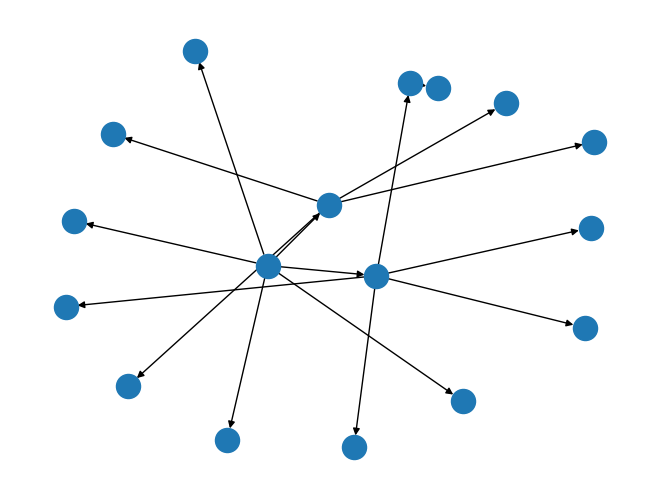

In [261]:
nx.draw(test_graph)

/Users/campbelleaston/Documents/DataScience/2022AdventOfCode/Advent3.11venv/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


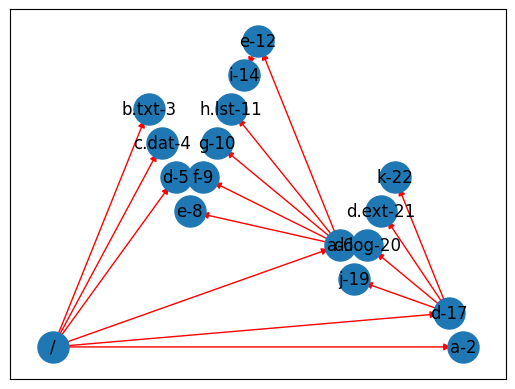

In [262]:
G = test_graph
pos = nx.planar_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
plt.show()

In [263]:
nx.is_directed_acyclic_graph(G)

True

In [264]:
G.nodes(data=True)

NodeDataView({'/': {'size': 0, 'is_dir': True, 'order_added': 0}, 'a-2': {'size': 0, 'is_dir': True, 'order_added': 2}, 'b.txt-3': {'size': 14848514, 'is_dir': False, 'order_added': 3}, 'c.dat-4': {'size': 8504156, 'is_dir': False, 'order_added': 4}, 'd-5': {'size': 0, 'is_dir': True, 'order_added': 5}, 'a-6': {'size': 0, 'is_dir': True, 'order_added': 6}, 'e-8': {'size': 0, 'is_dir': True, 'order_added': 8}, 'f-9': {'size': 29116, 'is_dir': False, 'order_added': 9}, 'g-10': {'size': 2557, 'is_dir': False, 'order_added': 10}, 'h.lst-11': {'size': 62596, 'is_dir': False, 'order_added': 11}, 'e-12': {'size': 0, 'is_dir': True, 'order_added': 12}, 'i-14': {'size': 584, 'is_dir': False, 'order_added': 14}, 'd-17': {'size': 0, 'is_dir': True, 'order_added': 17}, 'j-19': {'size': 4060174, 'is_dir': False, 'order_added': 19}, 'd.log-20': {'size': 8033020, 'is_dir': False, 'order_added': 20}, 'd.ext-21': {'size': 5626152, 'is_dir': False, 'order_added': 21}, 'k-22': {'size': 7214296, 'is_dir':

In [265]:
# Total size of a directory is the size of any child files

In [266]:
def get_contained_sizes(G, node_name):
    
    contained_file_sizes = [G.nodes[n]['size'] for n in nx.descendants(G, source=node_name)]
    
    return sum(contained_file_sizes)

# get_contained_sizes(G, 'a')

In [267]:
#nx.descendants(G, source='a')

In [268]:
def find_dir_size(G):
    
    dir_sizes = {}
    
    for n in G.nodes.keys():
        size = get_contained_sizes(G, n)
        if size > 0:
            dir_sizes[n] = size
    
    return dir_sizes




In [269]:
def assign_dir_sizes(G, dir_sizes):
    
    for d in dir_sizes.keys():
        if dir_sizes[d] > 0:
            G.nodes[d]['size'] = dir_sizes[d]
        
    return G


In [270]:
dir_sizes = find_dir_size(G)
assign_dir_sizes(G, dir_sizes)
assert(G.nodes['/']['size'] == 48381165)
assert(G.nodes['a']['size'] == 94853)
assert(G.nodes['e']['size'] == 584) ## yes
assert(G.nodes['d']['size'] == 24933642) ##yes

KeyError: 'a'

In [271]:
nx.descendants(G, source='a')

NetworkXError: The node a is not in the digraph.

In [272]:
G.nodes(data=True)

NodeDataView({'/': {'size': 48381165, 'is_dir': True, 'order_added': 0}, 'a-2': {'size': 0, 'is_dir': True, 'order_added': 2}, 'b.txt-3': {'size': 14848514, 'is_dir': False, 'order_added': 3}, 'c.dat-4': {'size': 8504156, 'is_dir': False, 'order_added': 4}, 'd-5': {'size': 0, 'is_dir': True, 'order_added': 5}, 'a-6': {'size': 94853, 'is_dir': True, 'order_added': 6}, 'e-8': {'size': 0, 'is_dir': True, 'order_added': 8}, 'f-9': {'size': 29116, 'is_dir': False, 'order_added': 9}, 'g-10': {'size': 2557, 'is_dir': False, 'order_added': 10}, 'h.lst-11': {'size': 62596, 'is_dir': False, 'order_added': 11}, 'e-12': {'size': 584, 'is_dir': True, 'order_added': 12}, 'i-14': {'size': 584, 'is_dir': False, 'order_added': 14}, 'd-17': {'size': 24933642, 'is_dir': True, 'order_added': 17}, 'j-19': {'size': 4060174, 'is_dir': False, 'order_added': 19}, 'd.log-20': {'size': 8033020, 'is_dir': False, 'order_added': 20}, 'd.ext-21': {'size': 5626152, 'is_dir': False, 'order_added': 21}, 'k-22': {'size'

In [276]:
# Find dir with total size of 100,000

def find_dir_sum(G):
    
    smallish_dirs = []

    for x in G.nodes:
        if G.nodes[x]['is_dir'] == True:
            if G.nodes[x]['size'] <= 100000:
                #print(x, G.nodes[x]['size'], G.nodes[x]['is_dir'])
                smallish_dirs.append(G.nodes[x]['size'])

    return sum(smallish_dirs)

#find_dir_sum(G)

In [277]:
def puzzle1(in_file):
    
    data = input_list(in_file)
    G = populate_graph(data)
    dir_sizes = find_dir_size(G)
    G = assign_dir_sizes(G, dir_sizes)
    s = find_dir_sum(G)
    
    return find_dir_sum(G)
    
assert(puzzle1('Day7Sample.txt') == 95437) 

In [278]:
#Guessed 562496. too low
#2nd guess: 1501149. Correct!!! Works now that I added the unique identifiers to the node

puzzle1('Day7input.txt')

1501149

In [ ]:
raw = input_list('Day7input.txt')
#G = populate_graph(raw[:10])  ##test: just do the first 100

In [223]:
#just_file_sizes = G.nodes(data=True)

In [228]:
G = populate_graph(raw[:111]) ##test: just do the first 100
dir_sizes = find_dir_size(G)
G = assign_dir_sizes(G, dir_sizes)
G.nodes(data=True)

$ cd /
node: / children: set() parents set()
$ ls
165965 cmwllbzl.jlm
node: cmwllbzl.jlm children: set() parents {'/'}
68612 ggb.qgd
node: ggb.qgd children: set() parents {'/'}
dir gwnwqcgq
node: gwnwqcgq children: set() parents {'/'}
dir pdlpwdp
node: pdlpwdp children: set() parents {'/'}
211084 qgcn.rbj
node: qgcn.rbj children: set() parents {'/'}
dir sbps
node: sbps children: set() parents {'/'}
179881 sdpjprfb.lsh
node: sdpjprfb.lsh children: set() parents {'/'}
318082 tdhgd.lwf
node: tdhgd.lwf children: set() parents {'/'}
dir wvdlv
node: wvdlv children: set() parents {'/'}
$ cd gwnwqcgq
node: gwnwqcgq children: set() parents {'/'}
$ ls
dir btddw
node: btddw children: set() parents {'/', 'gwnwqcgq'}
310195 cqsblt.jwb
node: cqsblt.jwb children: set() parents {'/', 'gwnwqcgq'}
dir ggb
node: ggb children: set() parents {'/', 'gwnwqcgq'}
dir hhdfbj
node: hhdfbj children: set() parents {'/', 'gwnwqcgq'}
dir hrj
node: hrj children: set() parents {'/', 'gwnwqcgq'}
dir mdhln
node: mdhln c

NodeDataView({'/': {'size': 5600614, 'is_dir': True}, 'cmwllbzl.jlm': {'size': 165965, 'is_dir': False}, 'ggb.qgd': {'size': 68612, 'is_dir': False}, 'gwnwqcgq': {'size': 4656990, 'is_dir': True}, 'pdlpwdp': {'size': 0, 'is_dir': True}, 'qgcn.rbj': {'size': 211084, 'is_dir': False}, 'sbps': {'size': 0, 'is_dir': True}, 'sdpjprfb.lsh': {'size': 179881, 'is_dir': False}, 'tdhgd.lwf': {'size': 318082, 'is_dir': False}, 'wvdlv': {'size': 0, 'is_dir': True}, 'btddw': {'size': 4487472, 'is_dir': True}, 'cqsblt.jwb': {'size': 244911, 'is_dir': False}, 'ggb': {'size': 194693, 'is_dir': False}, 'hhdfbj': {'size': 0, 'is_dir': True}, 'hrj': {'size': 0, 'is_dir': True}, 'mdhln': {'size': 0, 'is_dir': True}, 'nwbndtgl': {'size': 0, 'is_dir': True}, 'pjmc': {'size': 3774221, 'is_dir': False}, 'rgb': {'size': 0, 'is_dir': True}, 'sdpjprfb': {'size': 240529, 'is_dir': True}, 'tbswl.btw': {'size': 169518, 'is_dir': False}, 'hjs.dcw': {'size': 315327, 'is_dir': False}, 'pmqmgjsw.rqn': {'size': 99361, '

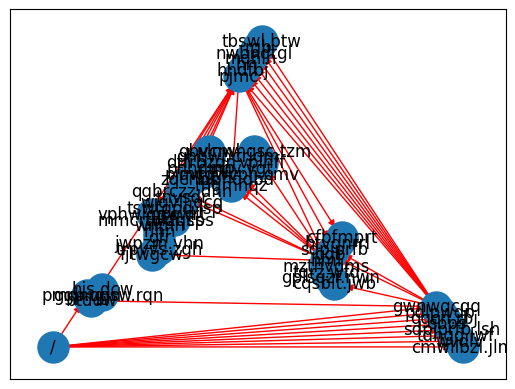

In [232]:
pos = nx.planar_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
plt.show()

In [230]:
[print(x) for x in nx.simple_cycles(G)]

['pjmc', 'zqcnhs', 'dtfrbzgn']


[None]

In [231]:
#input line 139 leads to not planar;
#100 still DAG:
#110 - 111not being DAG anymore; simple cycle ['pjmc', 'zqcnhs', 'dtfrbzgn']

nx.is_directed_acyclic_graph(G)

False

In [123]:
raw[111]

'81684 sdpjprfb'

In [121]:
nx.descendants(G,'sdpjprfb')

{'cfbfmprt', 'htvgnrrl'}

In [124]:
nx.ancestors(G,'sdpjprfb')

{'/', 'btddw', 'gwnwqcgq', 'pjmc'}

In [ ]:
import pathlib
import sys


class Node():
    def __init__(self):
        self.parent = None
        self.children = []  # None if file, [] if folder
        self.name = None
        self.size = 0

    def print_node(self, action):
        print(f"'action:{action}'   name: {self.name} parent:{None if self.parent is None else self.parent.name} "
              f"children_len:"
              f"{len(self.children) if self.children else None} size:{self.size}")


def parse(puzzle_input):
    """Parse input."""
    terminal = puzzle_input.strip().split("\n")
    head = None
    curr_node = None

    for action in terminal:
        match action.split(" "):
            case '$', 'cd', directory:
                if directory == '..':
                    curr_node = curr_node.parent
                elif directory == '/':
                    head = Node()
                    head.name = directory
                    curr_node = head
                else:
                    next_node = [child for child in curr_node.children if child.name == directory]
                    curr_node = next_node[0]
            case '$', 'ls':
                continue
            case 'dir', directory:
                new_node = Node()
                new_node.name = directory
                new_node.parent = curr_node
                curr_node.children.append(new_node)
            case size, file:
                new_node = Node()
                new_node.children = None
                new_node.name = file
                new_node.size = int(size)
                new_node.parent = curr_node
                curr_node.children.append(new_node)

    calculate_folder_sizes(head, head.size)

    return head


def calculate_folder_sizes(head, size):
    if head.children is None:
        return head, head.size
    else:
        size_sum = sum([calculate_folder_sizes(child, size)[1] for child in head.children])
        head.size += size_sum
        return head, head.size


def sum_directories_less_than_100000(head, total):
    if head.children is None:
        return head, total
    else:
        total += head.size if head.size <= 100000 else 0
        for child in head.children:
            total = sum_directories_less_than_100000(child, total)[1]

        return head, total


def smallest_dir_for_shortfall(head, size, shortfall):
    if head.children is None:
        return head, size, shortfall
    else:
        if size == 0:
            size = max(size, head.size if head.size >= shortfall else size)
        else:
            size = min(size, head.size if head.size >= shortfall else size)
        for child in head.children:
            size = smallest_dir_for_shortfall(child, size, shortfall)[1]

        return head, size, shortfall


def part1(head):
    """Solve part 1."""
    return sum_directories_less_than_100000(head, 0)[1]


def part2(head):
    """Solve part 2."""
    total_used = head.size
    available = 70000000
    target_unused = 30000000
    current_unused = available - total_used
    shortfall = target_unused - current_unused
    return smallest_dir_for_shortfall(head, 0, shortfall)[1]


def solve(puzzle_input):
    """Solve the puzzle for the given input."""
    data = parse(puzzle_input)
    solution1 = part1(data)
    solution2 = part2(data)

    return solution1, solution2


if __name__ == "__main__":
    for path in sys.argv[1:]:
        print(f"{path}:")
        puzzle_input = pathlib.Path(path).read_text().strip()
        solutions = solve(puzzle_input)
        print("\n".join(str(solution) for solution in solutions))